In [85]:
import os
import re
import pandas as pd

In [86]:
folder_path = 'data_raw'
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
dfs = []
for file in json_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_json(file_path)
    dfs.append(data)
df = pd.concat(dfs, ignore_index=True)

In [87]:
df[['competition','homeTeam','awayTeam','attendance']].sample(50)

,competition,homeTeam,awayTeam,attendance
22337,2017–18 UEFA Europa League qualifying phase an...,Lyngby,Slovan Bratislava,"2,286"
7529,1994–95 UEFA Cup,GKS Katowice,Aris,"8,000"
16495,2009–10 UEFA Europa League group stage,Lille,Genoa,"16,518"
21688,2016–17 UEFA Europa League qualifying phase an...,Debrecen,Torpedo-BelAZ Zhodino,"6,015"
14452,2006–07 UEFA Champions League group stage,Milan,Lille,"27,067"
7855,1995–96 UEFA Cup,Lugano,Internazionale,"12,000"
18464,2012–13 UEFA Champions League knockout phase,Bayern Munich,Barcelona,"68,000"
12738,2003–04 UEFA Cup,Kaiserslautern,Teplice,"18,511"
18940,2012–13 UEFA Europa League qualifying phase,Dila Gori,AGF,"5,800"
26165,2023–24 UEFA Champions League qualifying phase...,Ballkani,Ludogorets Razgrad,"7,656"


In [88]:
df['attendance'] = df['attendance'].apply(lambda x: str(x).split('[')[0].replace(',',''))

In [89]:
df[['competition','homeTeam','awayTeam','attendance']].sample(20)

,competition,homeTeam,awayTeam,attendance
1028,1965–66 European Cup,Levski Sofia,Benfica,25315
11147,2000 UEFA Intertoto Cup,Chmel Blšany,Sigma Olomouc,800
732,1963–64 European Cup,Górnik Zabrze,Dukla Prague,76404
16247,2008 UEFA Intertoto Cup,Saturn Moscow Oblast,Stuttgart,10100
23788,2019–20 UEFA Europa League qualifying phase an...,Aberdeen,RoPS,14377
23138,2018–19 UEFA Europa League qualifying phase an...,Sarpsborg 08,St. Gallen,5460
21258,2016–17 UEFA Champions League qualifying phase...,Trenčín,Olimpija Ljubljana,3750
7557,1994–95 UEFA Cup,Lillestrøm,Bordeaux,2003
11445,2001–02 UEFA Cup,Pogoń Szczecin,Fylkir,4791
6568,1991–92 European Cup first round,Kispest Honvéd,Dundalk,2745


In [90]:
def denumber(x):
    if isinstance(x, str):
        while x[-1] in ['0','1','2','3','4','5','6','7','8','9']:
            x = x[:-1]
        return x.strip()
    else:
        return x

In [91]:
df['competition'].drop_duplicates().to_list()

['1955–56 European Cup',
 '1955–58 Inter-Cities Fairs Cup',
 '1956–57 European Cup',
 '1957–58 European Cup',
 '1958–59 European Cup',
 '1958–60 Inter-Cities Fairs Cup',
 '1959–60 European Cup',
 '1960–61 European Cup',
 "1960–61 European Cup Winners' Cup",
 '1960–61 Inter-Cities Fairs Cup',
 '1961–62 European Cup',
 "1961–62 European Cup Winners' Cup",
 '1961–62 Inter-Cities Fairs Cup',
 '1962–63 European Cup',
 "1962–63 European Cup Winners' Cup",
 '1962–63 Inter-Cities Fairs Cup',
 '1963–64 European Cup',
 "1963–64 European Cup Winners' Cup",
 '1963–64 Inter-Cities Fairs Cup',
 '1964–65 European Cup',
 "1964–65 European Cup Winners' Cup",
 '1964–65 Inter-Cities Fairs Cup',
 '1965–66 European Cup',
 "1965–66 European Cup Winners' Cup",
 '1965–66 Inter-Cities Fairs Cup',
 '1966–67 European Cup',
 "1966–67 European Cup Winners' Cup",
 '1966–67 Inter-Cities Fairs Cup',
 '1967–68 European Cup',
 "1967–68 European Cup Winners' Cup",
 '1967–68 Inter-Cities Fairs Cup',
 '1968–69 European Cu

In [92]:
def tell_competition(x):
    x = str(x)
    if "Cup Winners" in x:
        return "CWC"
    elif ("European Cup" in x) and ('Winners') not in x:
        return "UCL"
    elif "Champions League" in x:
        return "UCL"
    elif ("UEFA Cup" in x) and ('Winners') not in x:
        return "EL"
    elif "Europa League" in x:
        return "EL"
    elif "Conference League" in x:
        return "UECL"
    elif "Inter-Cities Fairs Cup" in x:
        return "ICFC"
    elif "Intertoto" in x:
        return "Intertoto"
    else:
        print(x)
        return None

In [93]:
def tell_season(x):
    x = str(x)
    try:
        season = re.search('\d{4}–{0,1}\d{0,4}',x).group()
        season = season.replace('–','-')
        if len(season) == 9:
            season = season[0:5] + season[-2:]
        elif len(season) == 4:
            season = f"{int(season) - 1}-{season[-2:]}"
        return season
    except:
        return None

In [94]:
df['competitonOriginal'] = df['competition']

In [95]:
df['competition'] = df['competitonOriginal'].apply(lambda x: tell_competition(x))

In [96]:
df['season'] = df['competitonOriginal'].apply(lambda x: tell_season(x))

In [97]:
df.groupby('competition').size().nlargest()

competition
EL           13350
UCL           8283
CWC           1988
Intertoto     1561
UECL          1382
dtype: int64

In [98]:
df['location'] = df['location'].apply(lambda x: denumber(x))

In [99]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [100]:
df = df.sort_values(by='date')

In [101]:
df['attendance'].sample(50)

8473     16000
528      25824
1901     28000
1032     24919
2426      8150
22682    54370
8310      2000
18044    25495
6548      2956
21476    15386
5831     71212
24675     9105
21600     1500
20541    76684
22839    28001
17866    24782
22124    21116
8706       127
16163     3000
3215     21000
18600    13392
11602    16066
11498     2139
14730     9236
14949     6884
13927    16861
26262      539
13143    31225
19171     6153
19568      952
18807    12135
10136    10239
6277     36000
9122     24375
26774    46583
5185     11000
21179    62034
20801    25000
26411     1200
10543    19414
19052    77856
609        nan
8754     15922
15367    32834
3756     15000
15831     3000
11913      370
22721     4520
22072     8021
17488      380
Name: attendance, dtype: object

In [102]:
df['attendance'] = df['attendance'].apply(lambda x: str(x).replace(' ',''))

In [103]:
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce')

In [104]:
df.groupby('season')['attendance'].mean().tail(100)

season
1955-56    31035.206897
1955-58    33821.166667
1956-57    41840.409091
1957-58    39241.395833
1958-59    36014.872727
               ...     
2020-21      536.553903
2021-22    14267.442857
2022-23    20429.975260
2023-24    21454.212422
2024-25     5674.134199
Name: attendance, Length: 72, dtype: float64

In [105]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
1075,CWC,1932-04-14,1-0,Celtic,Scotland,Celtic_F.C.,Liverpool,England,Liverpool_F.C.,"Celtic Park, Glasgow",Semi-finals,76397.0,1965–66 European Cup Winners' Cup,1965-66
39,ICFC,1955-06-04,0-5,Basel XI,Switzerland,Basel,London XI,England,London_XI,"St. Jakob Stadium, Basel",Group stage,NaN,1955–58 Inter-Cities Fairs Cup,1955-58
0,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",First round,30000.0,1955–56 European Cup,1955-56
1,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",First round,35000.0,1955–56 European Cup,1955-56
2,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",First round,7000.0,1955–56 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,UECL,2024-08-15,v,Baník Ostrava,Czech Republic,NaN,Copenhagen,Denmark,NaN,"Městský stadion, Ostrava",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27181,EL,2024-08-15,v,Viktoria Plzeň,Czech Republic,NaN,Kryvbas Kryvyi Rih,Ukraine,NaN,"Doosan Arena, Plzeň",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
26841,UCL,2025-05-31,v,TBD,,NaN,TBD,,NaN,"Allianz Arena, Munich",Knockout phase,NaN,2024–25 UEFA Champions League,2024-25
1029,UCL,NaT,Match unplayed,Derry City,Northern Ireland,Derry_City_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,NaN,First round,NaN,1965–66 European Cup,1965-66


In [106]:
df.shape

(27182, 14)

In [107]:
df = df.drop_duplicates()

In [108]:
df.shape

(27181, 14)

In [109]:
df = df.replace("1932-04-14","1966-04-14")
df = df.replace('Georgia (country)','Georgia')

In [110]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian F.C.'
df.loc[df['awayTeamUrl'] == 'Bohemian_F.C.', 'awayTeam'] = 'Bohemian F.C.'
df.loc[(df['homeTeam'].str.contains('Bohemia',na=False)) & (df['homeTeamCountry'] == 'Republic of Ireland'), 'homeTeam'] = 'Bohemian F.C.'
df.loc[(df['awayTeam'].str.contains('Bohemia',na=False)) & (df['awayTeamCountry'] == 'Republic of Ireland'), 'awayTeam'] = 'Bohemian F.C.'

In [111]:
df[df['homeTeam'].str.contains('Bohemian',na=False)]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
2199,EL,1972-09-27,0-3,Bohemian F.C.,Republic of Ireland,Bohemian_F.C.,Köln,West Germany,1._FC_K%C3%B6ln,"Dalymount Park, Dublin",First round,10800.0,1972–73 UEFA Cup,1972-73
2669,EL,1974-10-02,0-1,Bohemian F.C.,Republic of Ireland,Bohemian_F.C.,Hamburg,West Germany,Hamburger_SV,"Dalymount Park, Dublin",First round,3300.0,1974–75 UEFA Cup,1974-75
2827,EL,1975-09-17,1-2,Bohemians Prague,Czechoslovakia,Bohemians_1905,Budapest Honvéd,Hungary,Budapest_Honv%C3%A9d_FC,"Ďolíček, Prague",First round,3395.0,1975–76 UEFA Cup,1975-76
2772,UCL,1975-10-01,1-1,Bohemian F.C.,Republic of Ireland,Bohemian_F.C.,Rangers,Scotland,Rangers_F.C.,"Dalymount Park, Dublin",First round,4189.0,1975–76 European Cup,1975-76
3243,EL,1977-09-14,0-0,Bohemian F.C.,Republic of Ireland,Bohemian_F.C.,Newcastle United,England,Newcastle_United_F.C.,"Dalymount Park, Dublin",First round,20000.0,1977–78 UEFA Cup,1977-78
3390,UCL,1978-09-27,1-0,Bohemian F.C.,Republic of Ireland,Bohemian_F.C.,Omonia,Cyprus,AC_Omonia,"Flower Lodge, Cork",First round,4500.0,1978–79 European Cup,1978-79
3401,UCL,1978-10-18,0-0,Bohemian F.C.,Republic of Ireland,Bohemian_F.C.,Dynamo Dresden,East Germany,Dynamo_Dresden,"Oriel Park, Dundalk",Second round,2160.0,1978–79 European Cup,1978-79
3698,EL,1979-09-19,0-2,Bohemians Praha,Czechoslovakia,Bohemians_1905,Bayern Munich,West Germany,FC_Bayern_Munich,"Stadion Letná, Prague",First round,31000.0,1979–80 UEFA Cup,1979-80
3748,EL,1979-10-03,0-0,Bohemian F.C.,Republic of Ireland,Bohemian_F.C.,Sporting CP,Portugal,Sporting_CP,"Dalymount Park, Dublin",First round,2200.0,1979–80 UEFA Cup,1979-80
3931,EL,1980-09-17,3-1,Bohemians Prague,Czechoslovakia,Bohemians_1905,Sporting Gijón,Spain,Sporting_de_Gij%C3%B3n,"Ďolíček, Prague",First round,7000.0,1980–81 UEFA Cup,1980-81


In [112]:
df.sort_values(by='date')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
39,ICFC,1955-06-04,0-5,Basel XI,Switzerland,Basel,London XI,England,London_XI,"St. Jakob Stadium, Basel",Group stage,NaN,1955–58 Inter-Cities Fairs Cup,1955-58
0,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",First round,30000.0,1955–56 European Cup,1955-56
1,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",First round,35000.0,1955–56 European Cup,1955-56
2,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",First round,7000.0,1955–56 European Cup,1955-56
3,UCL,1955-09-14,0-4,Rot-Weiss Essen,West Germany,Rot-Weiss_Essen,Hibernian,Scotland,Hibernian_F.C.,"Georg-Melches-Stadion, Essen",First round,5000.0,1955–56 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27077,UECL,2024-08-15,v,Tromsø,Norway,NaN,Kilmarnock,Scotland,NaN,"Alfheim Stadion, Tromsø",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27081,UECL,2024-08-15,v,Vitória de Guimarães,Portugal,NaN,Zürich,Switzerland,NaN,"Estádio D. Afonso Henriques, Guimarães",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
26841,UCL,2025-05-31,v,TBD,,NaN,TBD,,NaN,"Allianz Arena, Munich",Knockout phase,NaN,2024–25 UEFA Champions League,2024-25
1029,UCL,NaT,Match unplayed,Derry City,Northern Ireland,Derry_City_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,NaN,First round,NaN,1965–66 European Cup,1965-66


In [113]:
df[df['score'] == 'v']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
4343,UCL,1982-10-20,v,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,17 Nëntori,Albania,KF_Tirana,NaN,Second round,NaN,1982–83 European Cup,1982-83
26898,UCL,2024-08-06,v,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,Ludogorets Razgrad,Bulgaria,PFC_Ludogorets_Razgrad,"Tofiq Bahramov Republican Stadium, Baku",Third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25
27162,EL,2024-08-06,v,Panevėžys,Lithuania,FK_Panev%C4%97%C5%BEys,Maccabi Tel Aviv,Israel,Maccabi_Tel_Aviv_F.C.,"LFF Stadium, Vilnius",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
27164,EL,2024-08-06,v,Petrocub Hîncești,Moldova,FC_Petrocub_H%C3%AEnce%C8%99ti,The New Saints,Wales,The_New_Saints_F.C.,"Stadionul Zimbru, Chișinău",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
26904,UCL,2024-08-06,v,Malmö FF,Sweden,Malm%C3%B6_FF,PAOK,Greece,PAOK_FC,"Stadion, Malmö",Third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27117,UECL,2024-08-15,v,Śląsk Wrocław,Poland,NaN,St. Gallen,Switzerland,NaN,"Wrocław Stadium, Wroclaw",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27119,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27123,UECL,2024-08-15,v,Baník Ostrava,Czech Republic,NaN,Copenhagen,Denmark,NaN,"Městský stadion, Ostrava",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27181,EL,2024-08-15,v,Viktoria Plzeň,Czech Republic,NaN,Kryvbas Kryvyi Rih,Ukraine,NaN,"Doosan Arena, Plzeň",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25


In [114]:
df = df[df['homeTeam'] != 'TBD']
df = df[df['awayTeam'] != 'TBD']

In [115]:
df[df['competition'].isnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season


In [116]:
df[df['phase'] == 'Summary']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
10251,EL,1999-08-10,3-1,Shakhtar Donetsk,Ukraine,FC_Shakhtar_Donetsk,Sileks,North Macedonia,FK_Sileks,"Shakhtar Stadium, Donetsk",Summary,15000.0,1999–2000 UEFA Cup qualifying round,1999-00
10319,EL,1999-08-12,0-6,Cwmbrân Town,Wales,Cwmbr%C3%A2n_Town_A.F.C.,Celtic,Scotland,Celtic_F.C.,"Ninian Park, Cardiff",Summary,2000.0,1999–2000 UEFA Cup qualifying round,1999-00
10277,EL,1999-08-12,1-5,Belshina Bobruisk,Belarus,FC_Belshina_Bobruisk,Omonia,Cyprus,AC_Omonia,"Dinamo Stadium, Minsk",Summary,9000.0,1999–2000 UEFA Cup qualifying round,1999-00
10259,EL,1999-08-12,0-2,Yerevan,Armenia,FC_Yerevan,Hapoel Tel Aviv,Israel,Hapoel_Tel_Aviv_F.C.,"Hrazdan Stadium, Yerevan",Summary,3200.0,1999–2000 UEFA Cup qualifying round,1999-00
10321,EL,1999-08-12,0-3,Portadown,Northern Ireland,Portadown_F.C.,CSKA Sofia,Bulgaria,PFC_CSKA_Sofia,"Shamrock Park, Portadown",Summary,3000.0,1999–2000 UEFA Cup qualifying round,1999-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,EL,2008-10-02,2-0,Benfica,Portugal,S.L._Benfica,Napoli,Italy,S.S.C._Napoli,"Estádio da Luz, Lisbon",Summary,56500.0,2008–09 UEFA Cup first round,2008-09
15905,EL,2008-10-02,2-1,Galatasaray,Turkey,Galatasaray_S.K._(football),Bellinzona,Switzerland,AC_Bellinzona,"Ali Sami Yen Stadium, Istanbul",Summary,19850.0,2008–09 UEFA Cup first round,2008-09
15907,EL,2008-10-02,0-1,Honka,Finland,FC_Honka,Racing Santander,Spain,Racing_de_Santander,"Finnair Stadium, Helsinki",Summary,9100.0,2008–09 UEFA Cup first round,2008-09
15896,EL,2008-10-02,1-1,Rapid București,Romania,FC_Rapid_Bucure%C8%99ti,Wolfsburg,Germany,VfL_Wolfsburg,"Stadionul Giulești-Valentin Stănescu, Bucharest",Summary,7000.0,2008–09 UEFA Cup first round,2008-09


In [117]:
df['phase'] = df['phase'].apply(lambda x: str(x).lower().replace('–','-'))

In [118]:
def desummary(row):
    if row['phase'] not in ['summary','teams','notes','match','matches','none','nan']:
        return row['phase']
    else:
        if 'League' in row['competition']:
            return row['competition'].split('League')[1].strip()
        elif 'Cup' in row['competition']:
            return row['competition'].split('Cup')[1].strip()

In [119]:
df['phase'] = df.apply(lambda x: desummary(x), axis=1)

In [120]:
df.groupby('phase').size()

phase
final                        205
finals                        60
first qualifying round      2044
first round                 4498
fourth round                  80
group a                       16
group b                       16
group c                       16
group d                       16
group stage                  376
groups                      5609
knockout round play-offs      80
knockout stage                 7
play-off round               977
preliminary round            534
qualifying phase              18
qualifying round             406
quarter-finals              1240
round of 16                  678
round of 32                  544
second qualifying round     2455
second round                2302
semi-finals                  779
third qualifying round      1696
third round                  857
tournament phase              14
dtype: int64

<Axes: xlabel='season'>

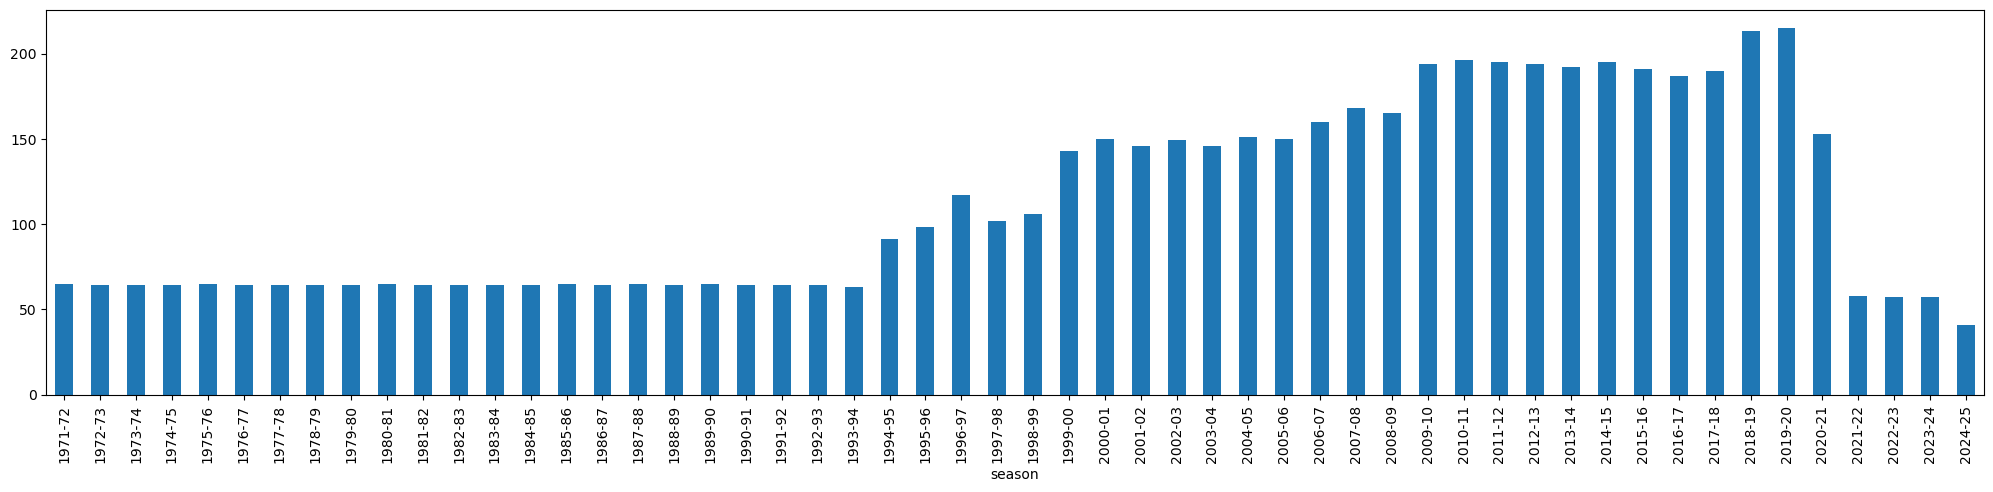

In [121]:
df[df['competition'] == 'EL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

In [122]:
df.to_csv(os.path.join('data','matches.csv'), index=False)